# Note

* All airline, all price
* 2023-07-12 : initial-all airlines, remove outlier, tunning Isotonic
* 2023-07-13 : simplify isotonic
* 2023-07-30 : update graph format, simplified equation
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations follow b0,b1
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

# get_slope (b1)

In [2]:
# taken from : https://stackoverflow.com/questions/41462419/python-slope-given-two-points-find-the-slope-answer-works-doesnt-work
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [3]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept (b0)

In [4]:
def get_intercept(x1, y1, x2, y2, b1):
    # b0 = y - (b1*x)
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [5]:
get_intercept(2, 3, 6, 7, get_slope(2, 3, 6, 7))

1.0

In [6]:
get_intercept(-22, 4.22890137, -18, 4.22890137, 0.0)

4.22890137

# get_linear_equation

In [7]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [8]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


In [9]:
get_linear_equation(2.3333,-4.567)

y = 2.33  -4.57 *x


In [10]:
get_linear_equation(2.3333,0)

y = 2.33


# Read CSV

In [11]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data\\data_files_for_model\\'

In [12]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_BKK_direct__2023-07-11_15-52-46.csv'
df = pd.read_csv(file_name)

In [13]:
df

route    airline_nm  direct depart_dt col_pre_depart_dt  \
0     LON-to-BKK       EVA Air  direct       1/5        2023-05-01   
1     LON-to-BKK  Thai Airways  direct       1/5        2023-05-01   
2     LON-to-BKK       EVA Air  direct       1/5        2023-05-01   
3     LON-to-BKK  Thai Airways  direct       1/5        2023-05-01   
4     LON-to-BKK       EVA Air  direct       1/5        2023-05-01   
...          ...           ...     ...       ...               ...   
2042  LON-to-BKK       EVA Air  direct       9/5        2023-05-09   
2043  LON-to-BKK  Thai Airways  direct       9/5        2023-05-09   
2044  LON-to-BKK  Thai Airways  direct       9/5        2023-05-09   
2045  LON-to-BKK       EVA Air  direct       9/5        2023-05-09   
2046  LON-to-BKK  Thai Airways  direct       9/5        2023-05-09   

       search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0     2023-04-01                 -30         560.0                 568.0   
1     2023-04-01                 -30         454.0                 526.0   
2     2023-04-02                 -29         560.0                 568.0   
3     2023-04-02                 -29         454.0                 526.0   
4     2023-04-03                 -28         560.0                 568.0   
...          ...                 ...           ...                   ...   
2042  2023-05-06                  -3         563.0                 567.0   
2043  2023-05-06                  -3         467.0                 472.0   
2044  2023-05-07                  -2         473.0                 472.0   
2045  2023-05-08                  -1         567.0                 567.0   
2046  2023-05-08                  -1         471.0                 472.0   

      col_saving_rate col_day_of_week  
0            1.408451          Monday  
1           13.688213          Monday  
2            1.408451          Monday  
3           13.688213          Monday  
4            1.408451          Monday  
...               ...             ...  
2042         0.705467         Tuesday  
2043         1.059322         Tuesday  
2044        -0.211864         Tuesday  
2045         0.000000         Tuesday  
2046         0.211864         Tuesday  

[2047 rows x 11 columns]

# Plot graph (Raw file)

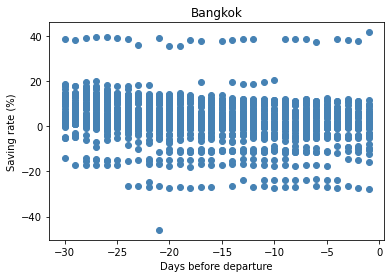

In [14]:
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color='steelblue')
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

# Remove Outlier

* https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In [15]:
file_name = folder + 'ticket_price_BKK_direct__2023-07-11_15-52-46.csv'
df_removeOutlier = pd.read_csv(file_name)

In [16]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df_removeOutlier['col_saving_rate'].quantile(0.5)
Q1 = df_removeOutlier['col_saving_rate'].quantile(0.25)
Q3 = df_removeOutlier['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_removeOutlier['col_saving_rate']>=upper)[0]
lower_array = np.where(df_removeOutlier['col_saving_rate']<=lower)[0]

median 1.8904
Q1 0.0000,Q3 6.5898, IQR 6.5898, upper 16.4745,lower -9.8847


In [17]:
# Removing the outliers
df_removeOutlier.drop(index=upper_array, inplace=True)
df_removeOutlier.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df_removeOutlier.shape)

New Shape:  (1844, 11)


# Plot graph (af outlier removed)

Data after outliner removal


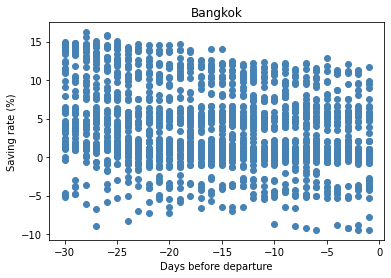

In [18]:
print('Data after outliner removal')
plt.scatter(df_removeOutlier['col_days_bf_depart'], df_removeOutlier['col_saving_rate'], color='steelblue')
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

# 1) Linear Regression

ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [19]:
import numpy as np

x = []
y = []
for index, row in df_removeOutlier.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(1844, 1844)

Linear regression------------------------------
Coefficients: [[-0.1751136]] 
Intercept: [1.07914134]
y_hat = 1.08  -0.18 x
Mean squared error: 23.11
Mean absolute error: 3.91
Coefficient of determination: 0.09


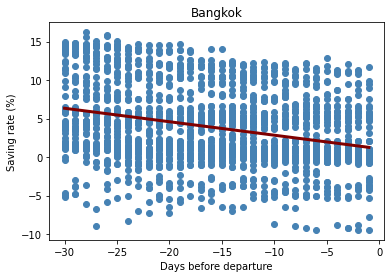

In [20]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , ' %.2f' % lnr_clf.coef_[0][0], 'x' )


# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color='steelblue')
plt.plot(x, lnr_y_pred, color="maroon", linewidth=3)
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

# 2) Isotonic Regression

Ref :
* theory : https://scikit-learn.org/stable/modules/isotonic.html
* function : https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression

In [21]:
df_removeOutlier

route    airline_nm  direct depart_dt col_pre_depart_dt  \
0     LON-to-BKK       EVA Air  direct       1/5        2023-05-01   
1     LON-to-BKK  Thai Airways  direct       1/5        2023-05-01   
2     LON-to-BKK       EVA Air  direct       1/5        2023-05-01   
3     LON-to-BKK  Thai Airways  direct       1/5        2023-05-01   
4     LON-to-BKK       EVA Air  direct       1/5        2023-05-01   
...          ...           ...     ...       ...               ...   
2042  LON-to-BKK       EVA Air  direct       9/5        2023-05-09   
2043  LON-to-BKK  Thai Airways  direct       9/5        2023-05-09   
2044  LON-to-BKK  Thai Airways  direct       9/5        2023-05-09   
2045  LON-to-BKK       EVA Air  direct       9/5        2023-05-09   
2046  LON-to-BKK  Thai Airways  direct       9/5        2023-05-09   

       search_dt  col_days_bf_depart  ticket_price  price_on_depart_date  \
0     2023-04-01                 -30         560.0                 568.0   
1     2023-04-01                 -30         454.0                 526.0   
2     2023-04-02                 -29         560.0                 568.0   
3     2023-04-02                 -29         454.0                 526.0   
4     2023-04-03                 -28         560.0                 568.0   
...          ...                 ...           ...                   ...   
2042  2023-05-06                  -3         563.0                 567.0   
2043  2023-05-06                  -3         467.0                 472.0   
2044  2023-05-07                  -2         473.0                 472.0   
2045  2023-05-08                  -1         567.0                 567.0   
2046  2023-05-08                  -1         471.0                 472.0   

      col_saving_rate col_day_of_week  
0            1.408451          Monday  
1           13.688213          Monday  
2            1.408451          Monday  
3           13.688213          Monday  
4            1.408451          Monday  
...               ...             ...  
2042         0.705467         Tuesday  
2043         1.059322         Tuesday  
2044        -0.211864         Tuesday  
2045         0.000000         Tuesday  
2046         0.211864         Tuesday  

[1844 rows x 11 columns]

In [22]:
x = df_removeOutlier['col_days_bf_depart'].to_numpy()
y = df_removeOutlier['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (1844,), numpy.ndarray, (1844,))

Isotonic Regression ------------------------------
param: 
{'increasing': 'auto', 'out_of_bounds': 'nan', 'y_max': 17, 'y_min': -10}
Mean squared error: 23.00
Mean absolute error: 3.90
Coefficient of determination: 0.10


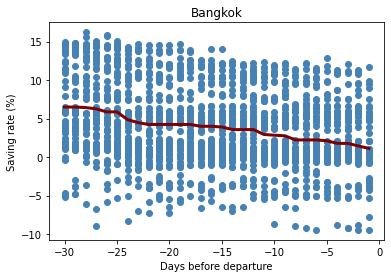

In [23]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = 'auto', y_min = math.floor(np.min(y)) , y_max = math.ceil(np.max(y)))

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Isotonic Regression " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
# plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(x, y, color = 'steelblue')
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

Isotonic Regression


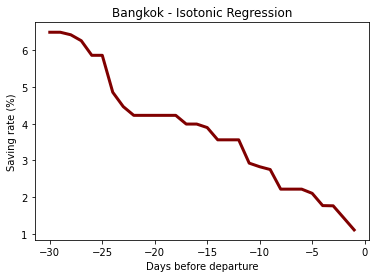

In [24]:
print("Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color="maroon", linewidth=3)
plt.title("Bangkok - Isotonic Regression")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

In [25]:
iso_clf.X_thresholds_

array([-30., -29., -28., -27., -26., -25., -24., -23., -22., -18., -17.,
       -16., -15., -14., -12., -11., -10.,  -9.,  -8.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.])

In [26]:
iso_clf.y_thresholds_

array([6.4916751 , 6.4916751 , 6.42270768, 6.26049833, 5.86362118,
       5.86362118, 4.85732669, 4.46663641, 4.22890137, 4.22890137,
       3.99183124, 3.99183124, 3.89632174, 3.56256583, 3.56256583,
       2.92770457, 2.82989378, 2.75370004, 2.21980175, 2.21980175,
       2.10558999, 1.77154601, 1.76601401, 1.43917442, 1.10957961])

## Simplify

Observe obvious range of saving rate as follow: 
1) (-30, 6.4916751), (-22, 4.22890137) --> decrease
2) (-22, 4.22890137), (-18, 4.22890137) --> steady
3) (-18, 4.22890137), (-1, 1.10957961) --> decrease

In [27]:
x_sim = [-30, -22, -18, -1]
y_sim = [6.4916751, 4.22890137, 4.22890137, 1.10957961]

Simplified Isotonic Regression


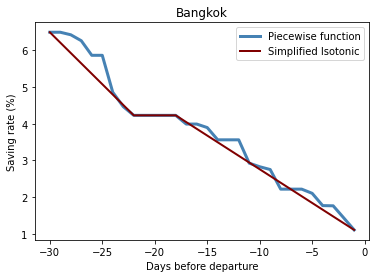

In [28]:
print("Simplified Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color="steelblue", linewidth=3, label="Piecewise function")
plt.plot(x_sim, y_sim, color="maroon", linewidth=2, label="Simplified Isotonic")

plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.legend()

plt.show()

Simplified Isotonic Regression


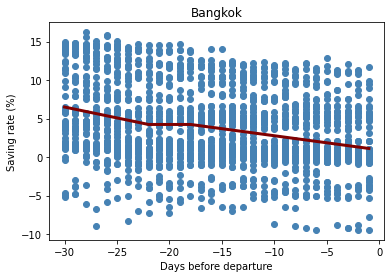

In [29]:
print("Simplified Isotonic Regression")
plt.scatter(x, y, color="steelblue")
plt.plot(x_sim, y_sim, color="maroon", linewidth=3)

plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## Equations

In [30]:
x_sim, y_sim

([-30, -22, -18, -1], [6.4916751, 4.22890137, 4.22890137, 1.10957961])

In [31]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-30,-22]
slope  -0.28284671625
-30 6.4916751 -22 4.22890137 -0.28284671625
intercept  -1.9937263874999998
y = -1.99  -0.28 *x
------------------------------ 
 2: x in [-22,-18]
slope  0.0
-22 4.22890137 -18 4.22890137 0.0
intercept  4.22890137
y = 4.23
------------------------------ 
 3: x in [-18,-1]
slope  -0.18348951529411764
-18 4.22890137 -1 1.10957961 -0.18348951529411764
intercept  0.9260900947058823
y = 0.93  -0.18 *x


## MSE

In [32]:
def predict_BKK(x):
    y = 0
    if x >= -30 and x < -22:
        y = -1.99  -0.28 *x
    elif x >= -22 and x < -18:
        y = 4.23
    else:
        y = 0.93  -0.18 *x
    return y

In [33]:
# x_sim = [-30, -22, -18, -1]
# y_sim = [6.4916751, 4.22890137, 4.22890137, 1.10957961]
predict_BKK(-30), predict_BKK(-22), predict_BKK(-18), predict_BKK(-1)

(6.41, 4.23, 4.17, 1.11)

Simpliflied Isotonic Regression------------------------------
Mean squared error: 23.10
Mean absolute error: 3.88
Coefficient of determination: 0.09


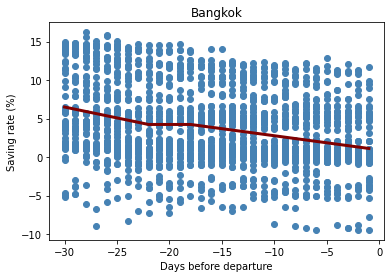

In [34]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(predict_BKK(i))

print("Simpliflied Isotonic Regression" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color="steelblue")
plt.plot(x_sim, y_sim, color="maroon", linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## Result

* trend change on day 22, 18
* but compare overall the saving rate not change much < 6% absolute change rate
* non-increasing period during 22 until 18 days bf depart
* the early you, buy the better